# Machine Learning Project

We start by importing the necessary packages for analysis.

In [1]:
# install.packages('ggplot2')
# install.packages('reshape2')
# install.packages('gridExtra')
# install.packages("reticulate")
# install.packages("tidyverse")
# install.packages("GGally")
# install.packages("plotly")


# install.packages("factoextra")
# install.packages("FactoMineR")
# install.packages("corrplot")
# install.packages("glmnet")
# install.packages("ggfortify")
# install.packages("pROC")

In [ ]:
library(reticulate)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
# PARTIE 1
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet)
library(ggfortify)
library(pROC)

## Analyse exploratoire des données

### Question 1

In [3]:
# Download data
path <- ""
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", header = TRUE)

# Printing data
head(data)
summary(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [4]:
# Changing the type of qualitative variables into factors
# data[, "Entity"] <- as.factor(data[, "Entity"])
#data[, "Year"] <- as.factor(data[, "Year"])
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

### Question 2

In the next section, we look for missing values in the dataset

In [5]:
# Count the number of missing values in the entire data frame
num_missing = sum(is.na(data))
print(num_missing)


[1] 6978


In [6]:
# Checking which columbs are missing values
for (col_name in colnames(data)) {
  print(paste(col_name))
  print(sum(is.na(data[[col_name]])))
}

[1] "Entity"
[1] 0
[1] "Year"
[1] 0
[1] "Access.to.electricity....of.population."
[1] 10
[1] "Access.to.clean.fuels.for.cooking"
[1] 169
[1] "Renewable.electricity.generating.capacity.per.capita"
[1] 931
[1] "Financial.flows.to.developing.countries..US..."
[1] 2089
[1] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] 194
[1] "Electricity.from.fossil.fuels..TWh."
[1] 21
[1] "Electricity.from.nuclear..TWh."
[1] 126
[1] "Electricity.from.renewables..TWh."
[1] 21
[1] "Low.carbon.electricity....electricity."
[1] 42
[1] "Primary.energy.consumption.per.capita..kWh.person."
[1] 0
[1] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] 207
[1] "Value_co2_emissions_kt_by_country"
[1] 428
[1] "Renewables....equivalent.primary.energy."
[1] 2137
[1] "gdp_growth"
[1] 317
[1] "gdp_per_capita"
[1] 282
[1] "Density.n.P.Km2."
[1] 1
[1] "Land.Area.Km2."
[1] 1
[1] "Latitude"
[1] 1
[1] "Longitude"
[1] 1


** Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset: **

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

*   Financial flows to developing countries (US Dollars)
*
Renewables (% equivalent primary energy).

In [ ]:
# Columns to remove
columns_to_remove = c("Financial.flows.to.developing.countries..US...", "Renewable.electricity.generating.capacity.per.capita", "Renewables....equivalent.primary.energy.")
Financial
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                   sep = ",", header = TRUE)
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

# Removeing the specified columns from the data frame
data = data[, -which(names(data) %in% columns_to_remove)]
head(data)


### Question 3

For the rest of this project, we decided to use a data set containing only individuals with no missing values. This leaves 2868 observations, which is verified bellow.

In [8]:
print('Dimension of the original data set')
dim(data)
data_complete = data[complete.cases(data), ]
print('Dimension of the new data set')
dim(data_complete)
data=data_complete

[1] "Dimension of the original data set"


[1] 3649   21

[1] "Dimension of the new data set"


[1] 343  21

## Question 4
We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, what is noticable is that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will do a barplot of all the countries that is missing at least a year. 

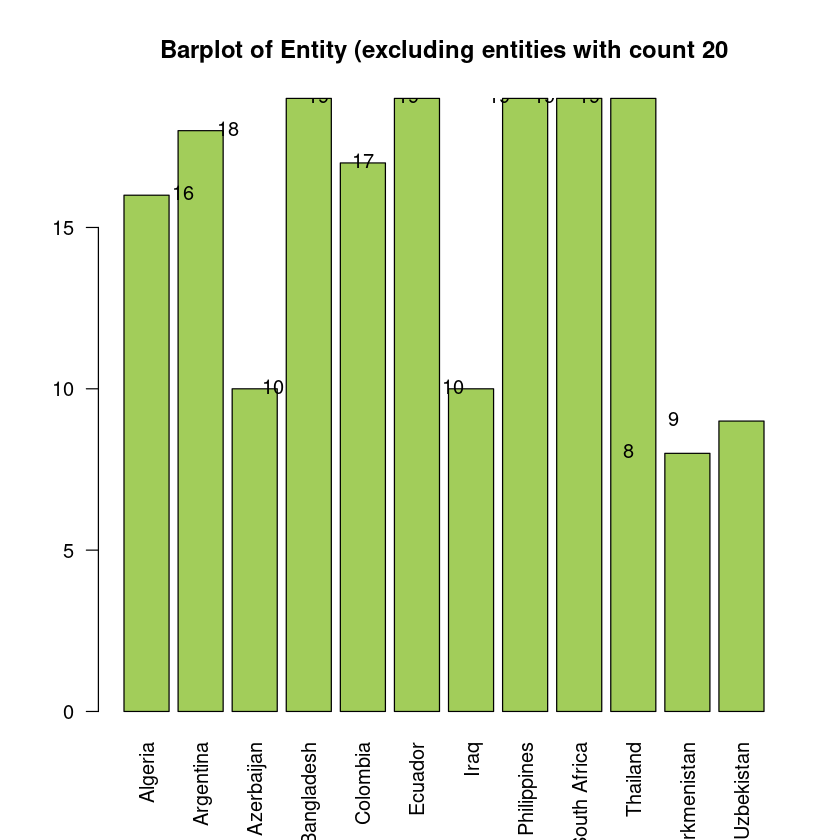

In [9]:
# Assuming 'data' is your data frame
entity_counts <- table(data$Entity)

# Set the threshold for the minimum number of appearances
appearance_threshold <- 20

# Get entities with count not equal to the threshold
filtered_entities <- names(entity_counts[entity_counts != appearance_threshold])

# Filter data for entities with count not equal to the threshold
filtered_data <- data[data$Entity %in% filtered_entities, ]

# Create a table of frequencies for the 'Entity' column in the filtered data
entity_table <- table(filtered_data$Entity)

# Create a barplot for the table of frequencies with rotated x-axis labels
barplot(entity_table, col = "darkolivegreen3", main = "Barplot of Entity (excluding entities with count 20",
        names.arg = filtered_entities, las = 2)

# Add counts as text labels on each bar
text(seq_along(entity_table), entity_table, labels = entity_table, pos = 4, col = "black", cex = 1)


Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables.

In [10]:
#Transformation of variables
#WARNING: Only run ONCE!!
data$Access.to.electricity....of.population. <- sqrt(data$Access.to.electricity....of.population.)
data$Access.to.clean.fuels.for.cooking <- sqrt(data$Access.to.clean.fuels.for.cooking)
data$Electricity.from.fossil.fuels..TWh. <- sqrt(data$Electricity.from.fossil.fuels..TWh.)
data$Electricity.from.nuclear..TWh. <- sqrt(data$Electricity.from.nuclear..TWh.)
data$Electricity.from.renewables..TWh. <- sqrt(data$Electricity.from.renewables.)
data$Value_co2_emissions_kt_by_country <- log(data$Value_co2_emissions_kt_by_country)
data$Primary.energy.consumption.per.capita..kWh.person. <- log(data$Primary.energy.consumption.per.capita..kWh.person.)
data$gdp_per_capita <- log(data$gdp_per_capita)
data$Land.Area.Km2. <- log(data$Land.Area.Km2.)

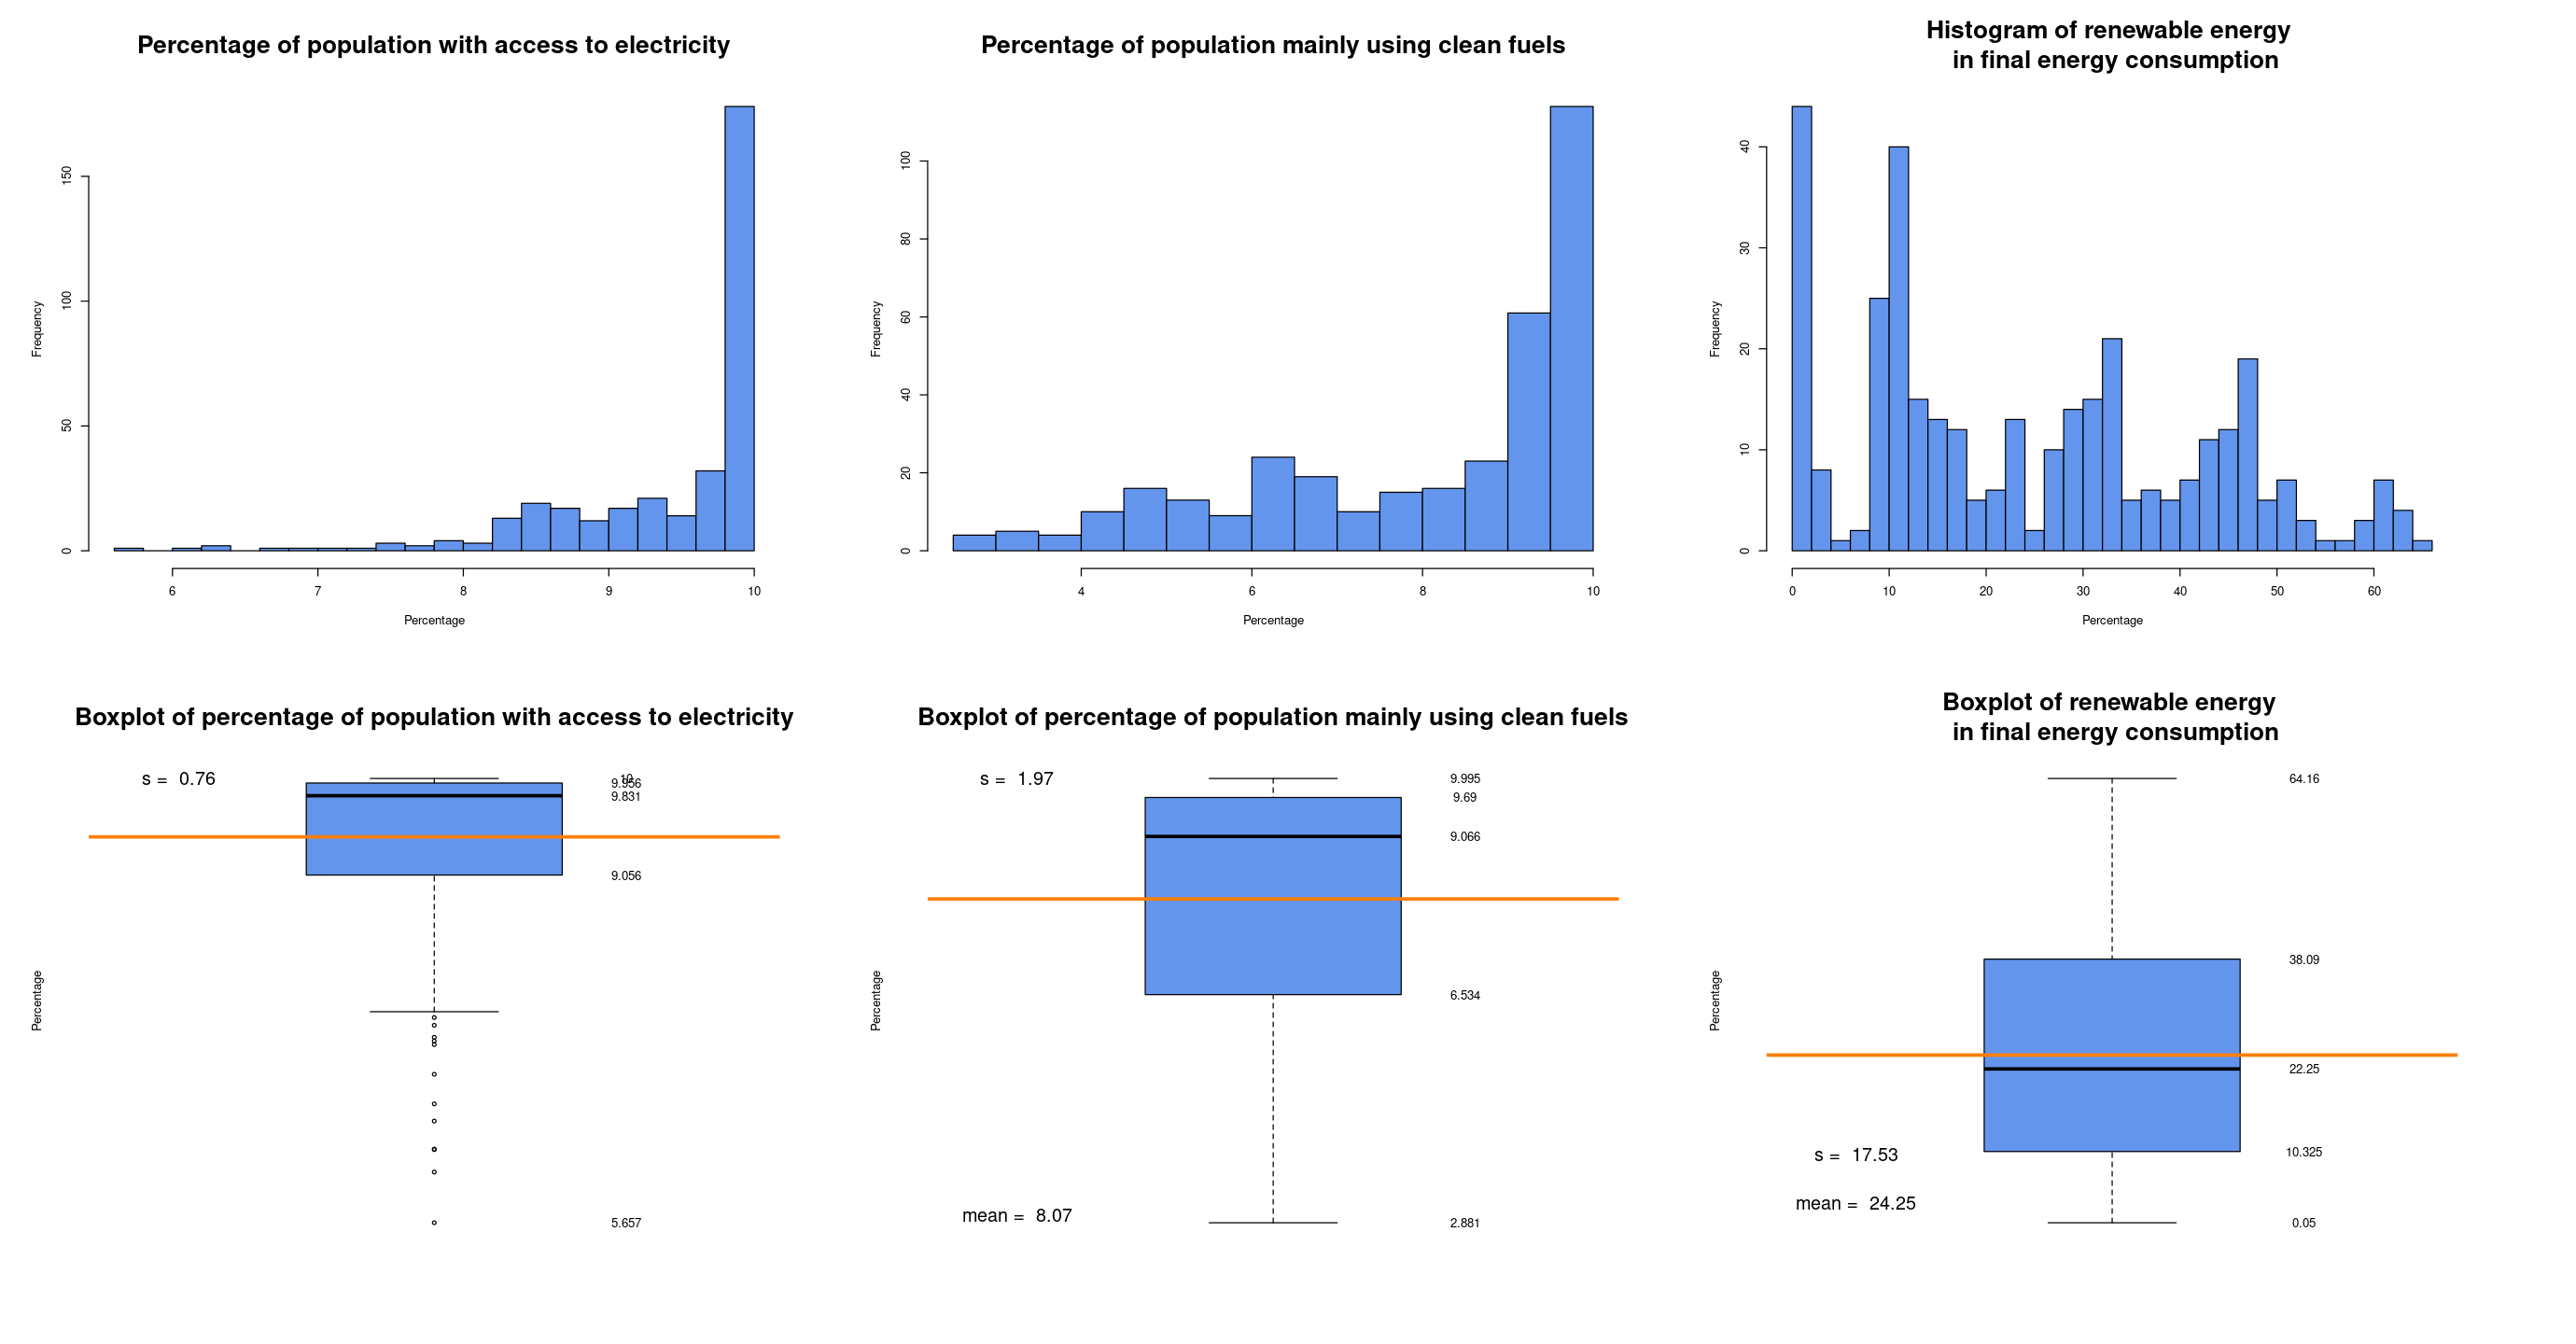

In [11]:
layout(matrix(c(1, 2, 3, 4, 5, 6 ), nrow=2, byrow=FALSE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))
options(repr.plot.width = 23, repr.plot.height = 12)

# Plot 1
hist(data$Access.to.electricity....of.population., main="Percentage of population with access to electricity",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.electricity....of.population., main = "Boxplot of percentage of population with access to electricity",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.electricity....of.population.), labels = round(fivenum(data$Access.to.electricity....of.population.),3), x = 1.3)
abline(h = mean(data$Access.to.electricity....of.population.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)

# Plot 2
hist(data$Access.to.clean.fuels.for.cooking, main="Percentage of population mainly using clean fuels",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.clean.fuels.for.cooking, main = "Boxplot of percentage of population mainly using clean fuels",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.clean.fuels.for.cooking), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Access.to.clean.fuels.for.cooking), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)

# Plot 3
hist(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main="Histogram of renewable energy \n in final energy consumption",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main = "Boxplot of renewable energy \n in final energy consumption",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....), labels = round(fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....),3), x = 1.3)
abline(h = mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)


This shows us that most places, a 100% of the population has access to electricity. This is almost the case for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most have 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%. 

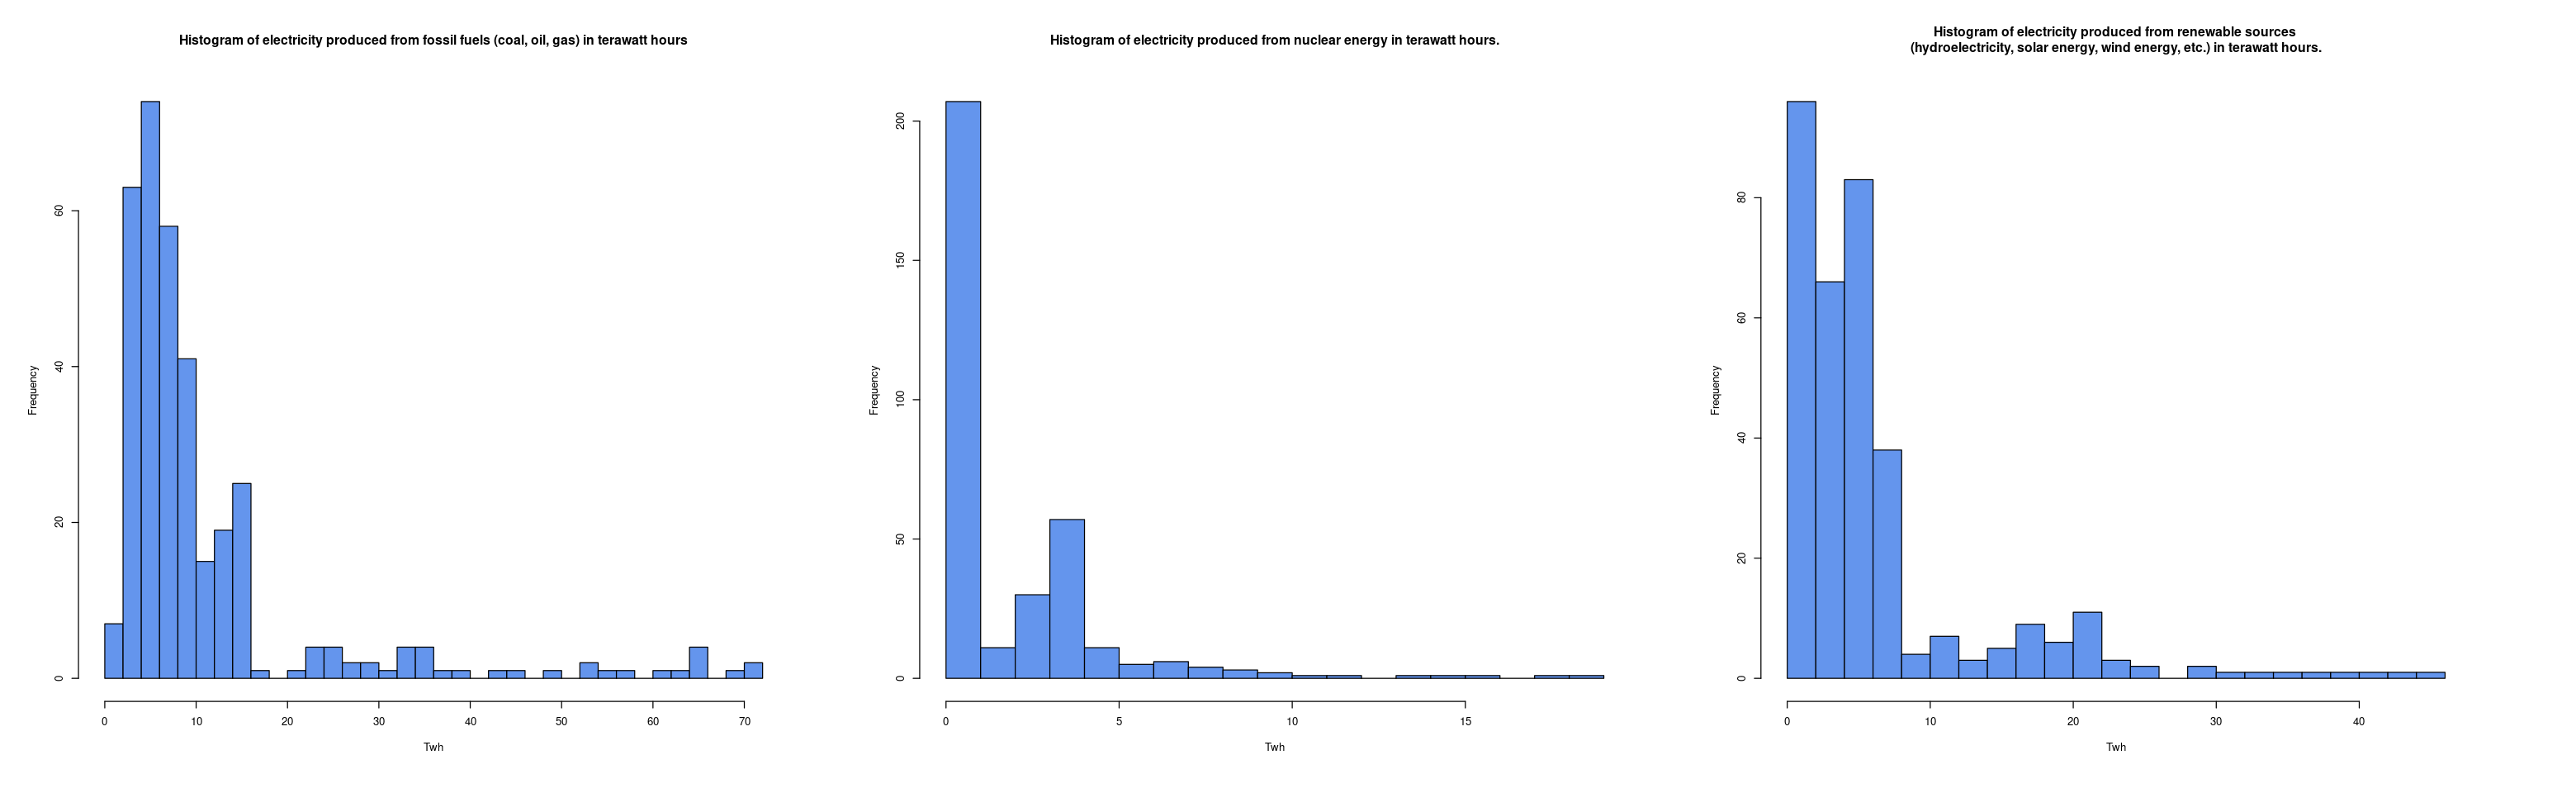

In [12]:
layout(matrix(c(1, 2, 3), nrow=1, byrow=FALSE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))
options(repr.plot.width = 26, repr.plot.height = 8)
# Plot 1
hist(data$Electricity.from.fossil.fuels..TWh., main="Histogram of electricity produced from fossil fuels (coal, oil, gas) in terawatt hours",
           xlab = 'Twh', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
# Plot 2
hist(data$Electricity.from.nuclear..TWh., main="Histogram of electricity produced from nuclear energy in terawatt hours.",
           xlab = 'Twh', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
# Plot 3
hist(data$Electricity.from.renewables..TWh., main="Histogram of electricity produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) in terawatt hours.",
           xlab = 'Twh', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)

With the next three variables, we have transformed the variables using a square root-tranformation. There is high frequancy of the lowest level of energy production, which is logical as not all countries produce a lot of electricity. 

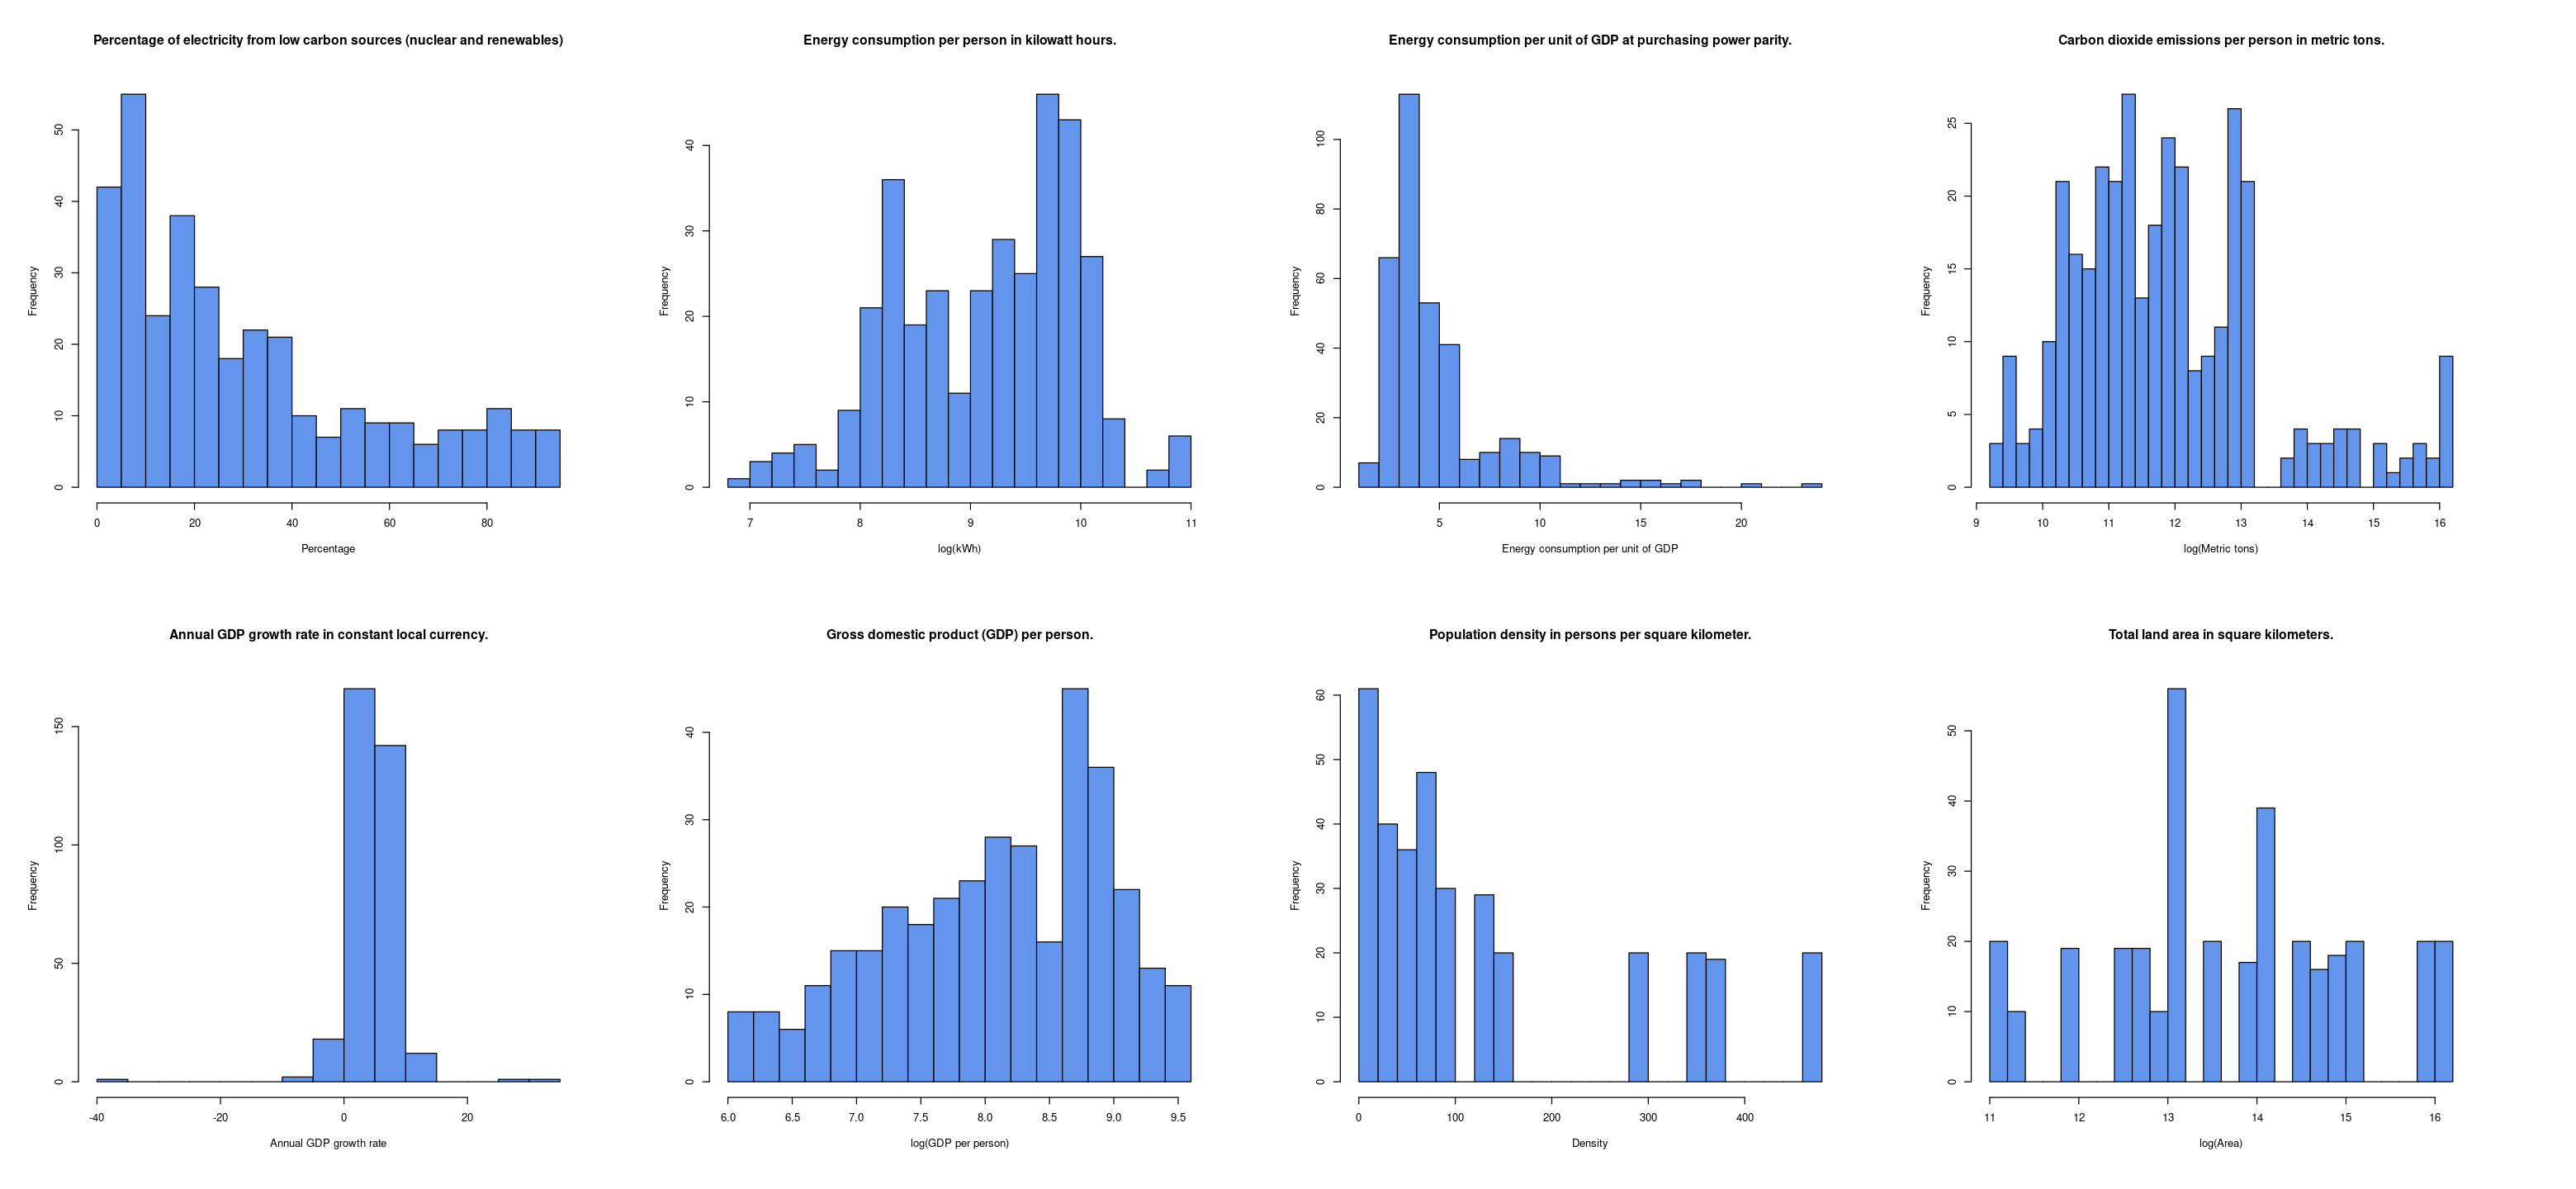

In [13]:
layout(matrix(c(1, 2, 3, 4, 5, 6, 7, 8), nrow=2, byrow=TRUE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))

options(repr.plot.width = 26, repr.plot.height = 12)
hist(data$Low.carbon.electricity....electricity., main="Percentage of electricity from low carbon sources (nuclear and renewables)",
           xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Primary.energy.consumption.per.capita..kWh.person., main="Energy consumption per person in kilowatt hours.",
           xlab = 'log(kWh)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP., main="Energy consumption per unit of GDP at purchasing power parity.",
           xlab = 'Energy consumption per unit of GDP', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Value_co2_emissions_kt_by_country, main="Carbon dioxide emissions per person in metric tons.",
           xlab = 'log(Metric tons)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$gdp_growth, main="Annual GDP growth rate in constant local currency.",
           xlab = 'Annual GDP growth rate', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$gdp_per_capita, main="Gross domestic product (GDP) per person.",
           xlab = 'log(GDP per person)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Density.n.P.Km2., main="Population density in persons per square kilometer.",
           xlab = 'Density', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Land.Area.Km2., main="Total land area in square kilometers.",
           xlab = 'log(Area)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electivity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e⁹ - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is e⁸ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0-5%
- GDP per person is centered around e⁸ = 2980
- Most places have a very low population density

## Question 5

Visualization of the great heterogeneity of CO2 emissions between countries.

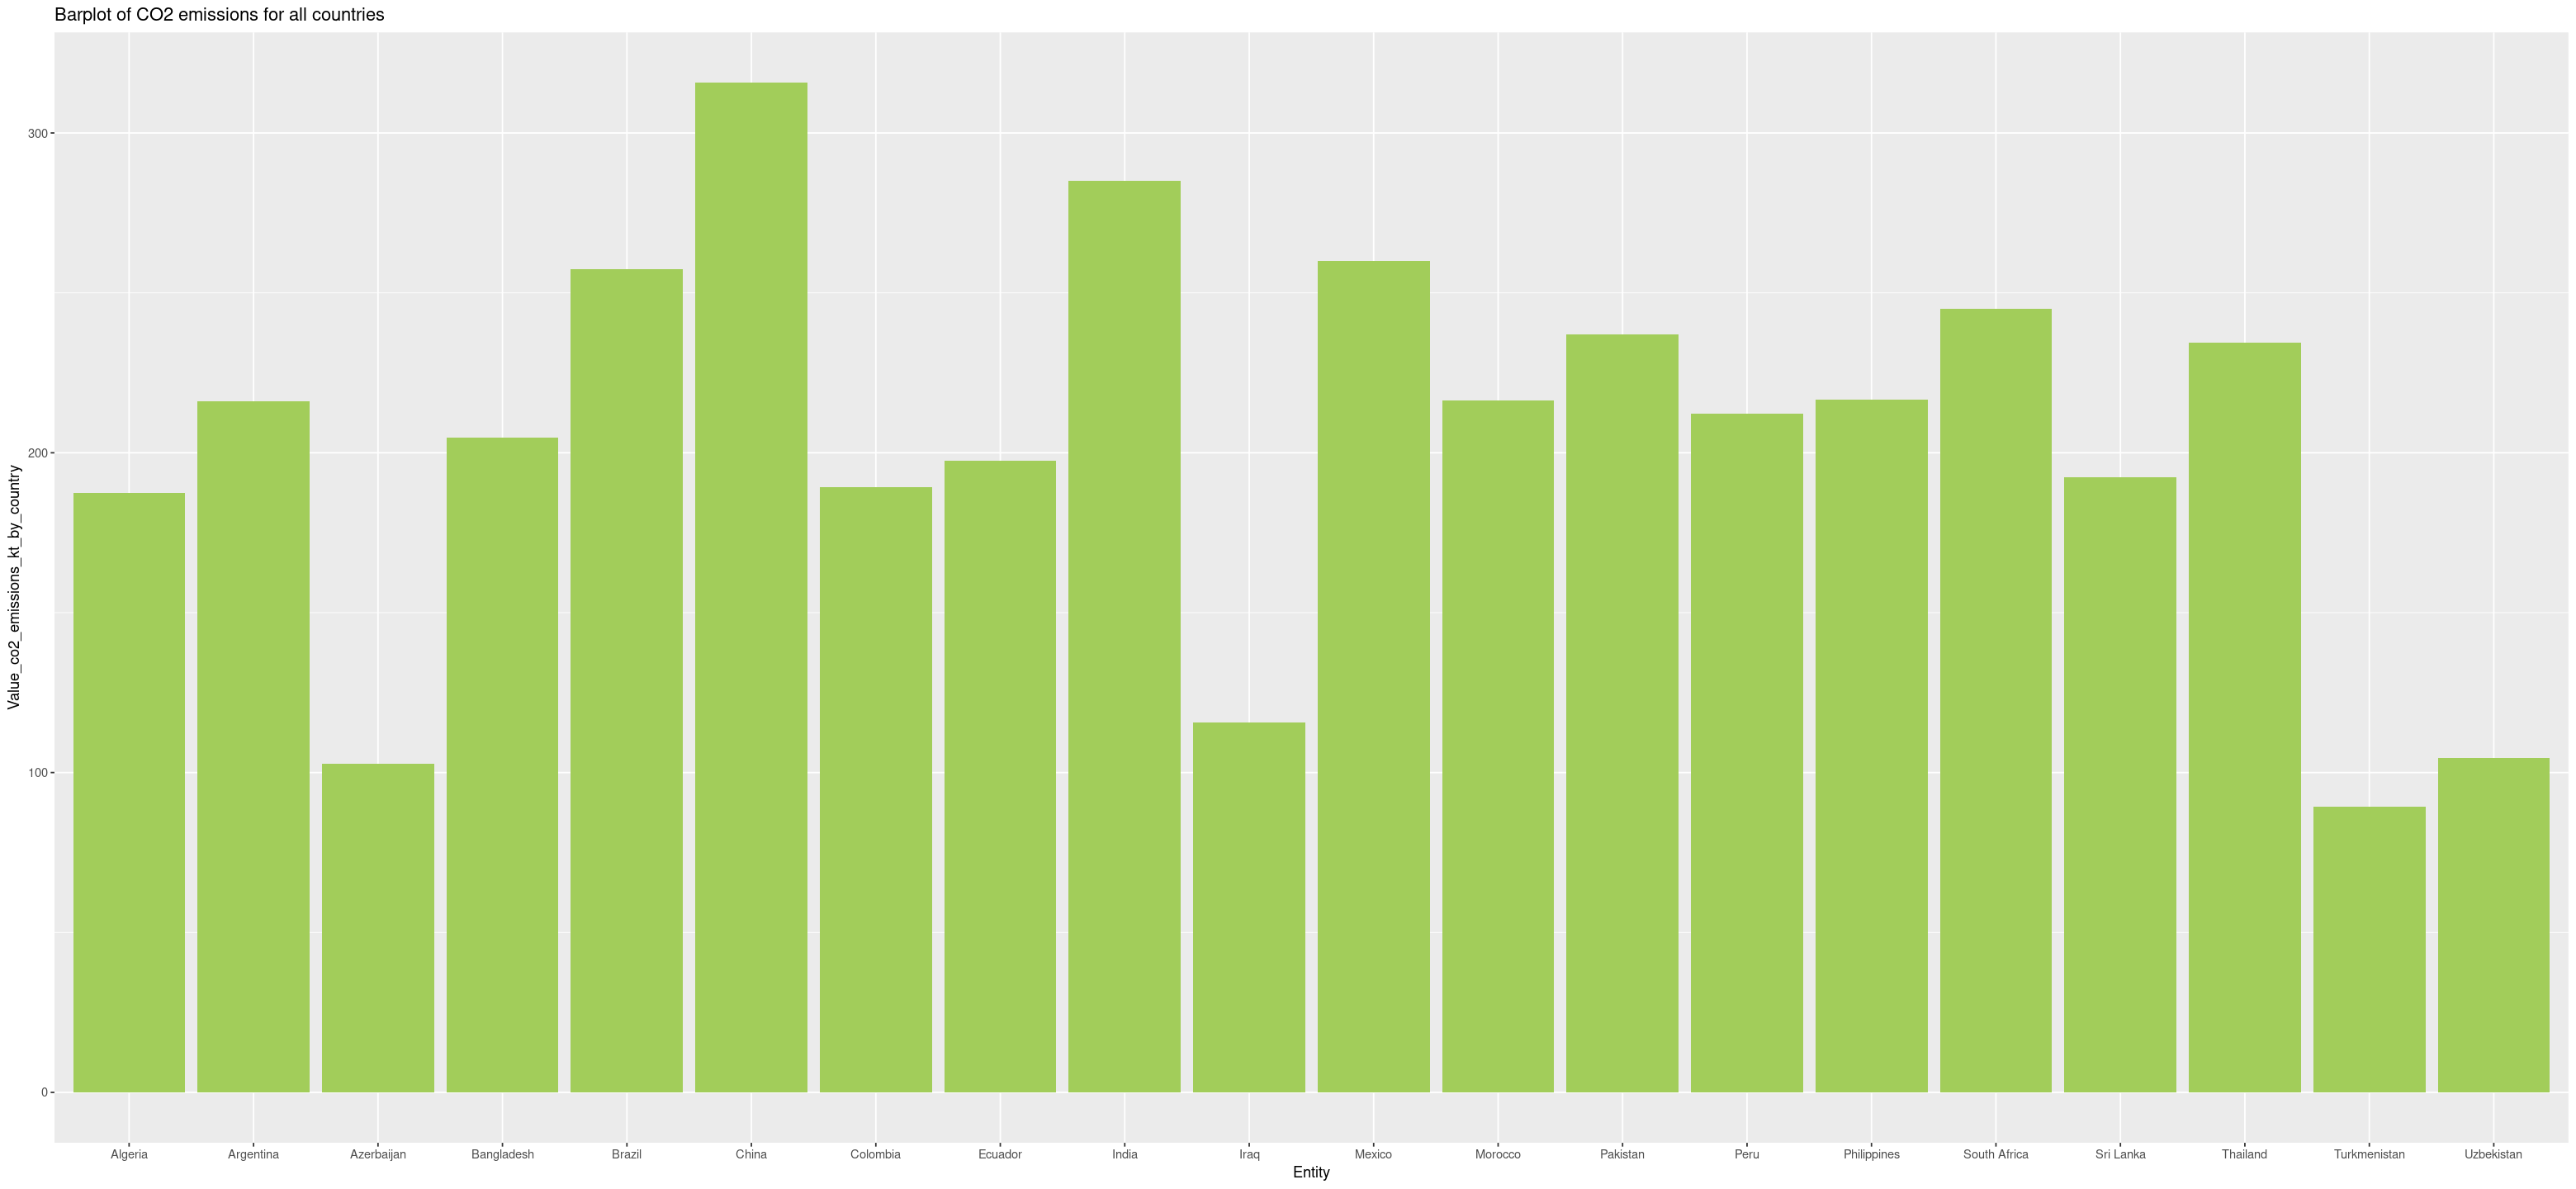

In [14]:
ggplot(data, aes(x = Entity, y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "darkolivegreen3") +
  labs(title = "Barplot of CO2 emissions for all countries",
       x = "Entity", y = "Value_co2_emissions_kt_by_country")


In [15]:
# Aggregate CO2 emissions by country over all years
total_emissions_by_country <- aggregate(Value_co2_emissions_kt_by_country ~ Entity, data = data, sum)

# Identification of the top 5 CO2 emitting countries
top5_emitters <- total_emissions_by_country[order(total_emissions_by_country$Value_co2_emissions_kt_by_country, decreasing = TRUE), ]
top5_emitters <- head(top5_emitters, 5)

# Display the top 5 CO2 emitting countries.
cat("The top 5 CO2 emitting countries are: \n")
cat(paste(top5_emitters$Entity, collapse = ", "))

The top 5 CO2 emitting countries are: 
China, India, Mexico, Brazil, South Africa

## Question 6


## Multidimensional descriptive analysis

We continue the descriptive analysis of the data through a multi-dimensional analysis. Firstly, we explore the data through a scatter plot matrix.

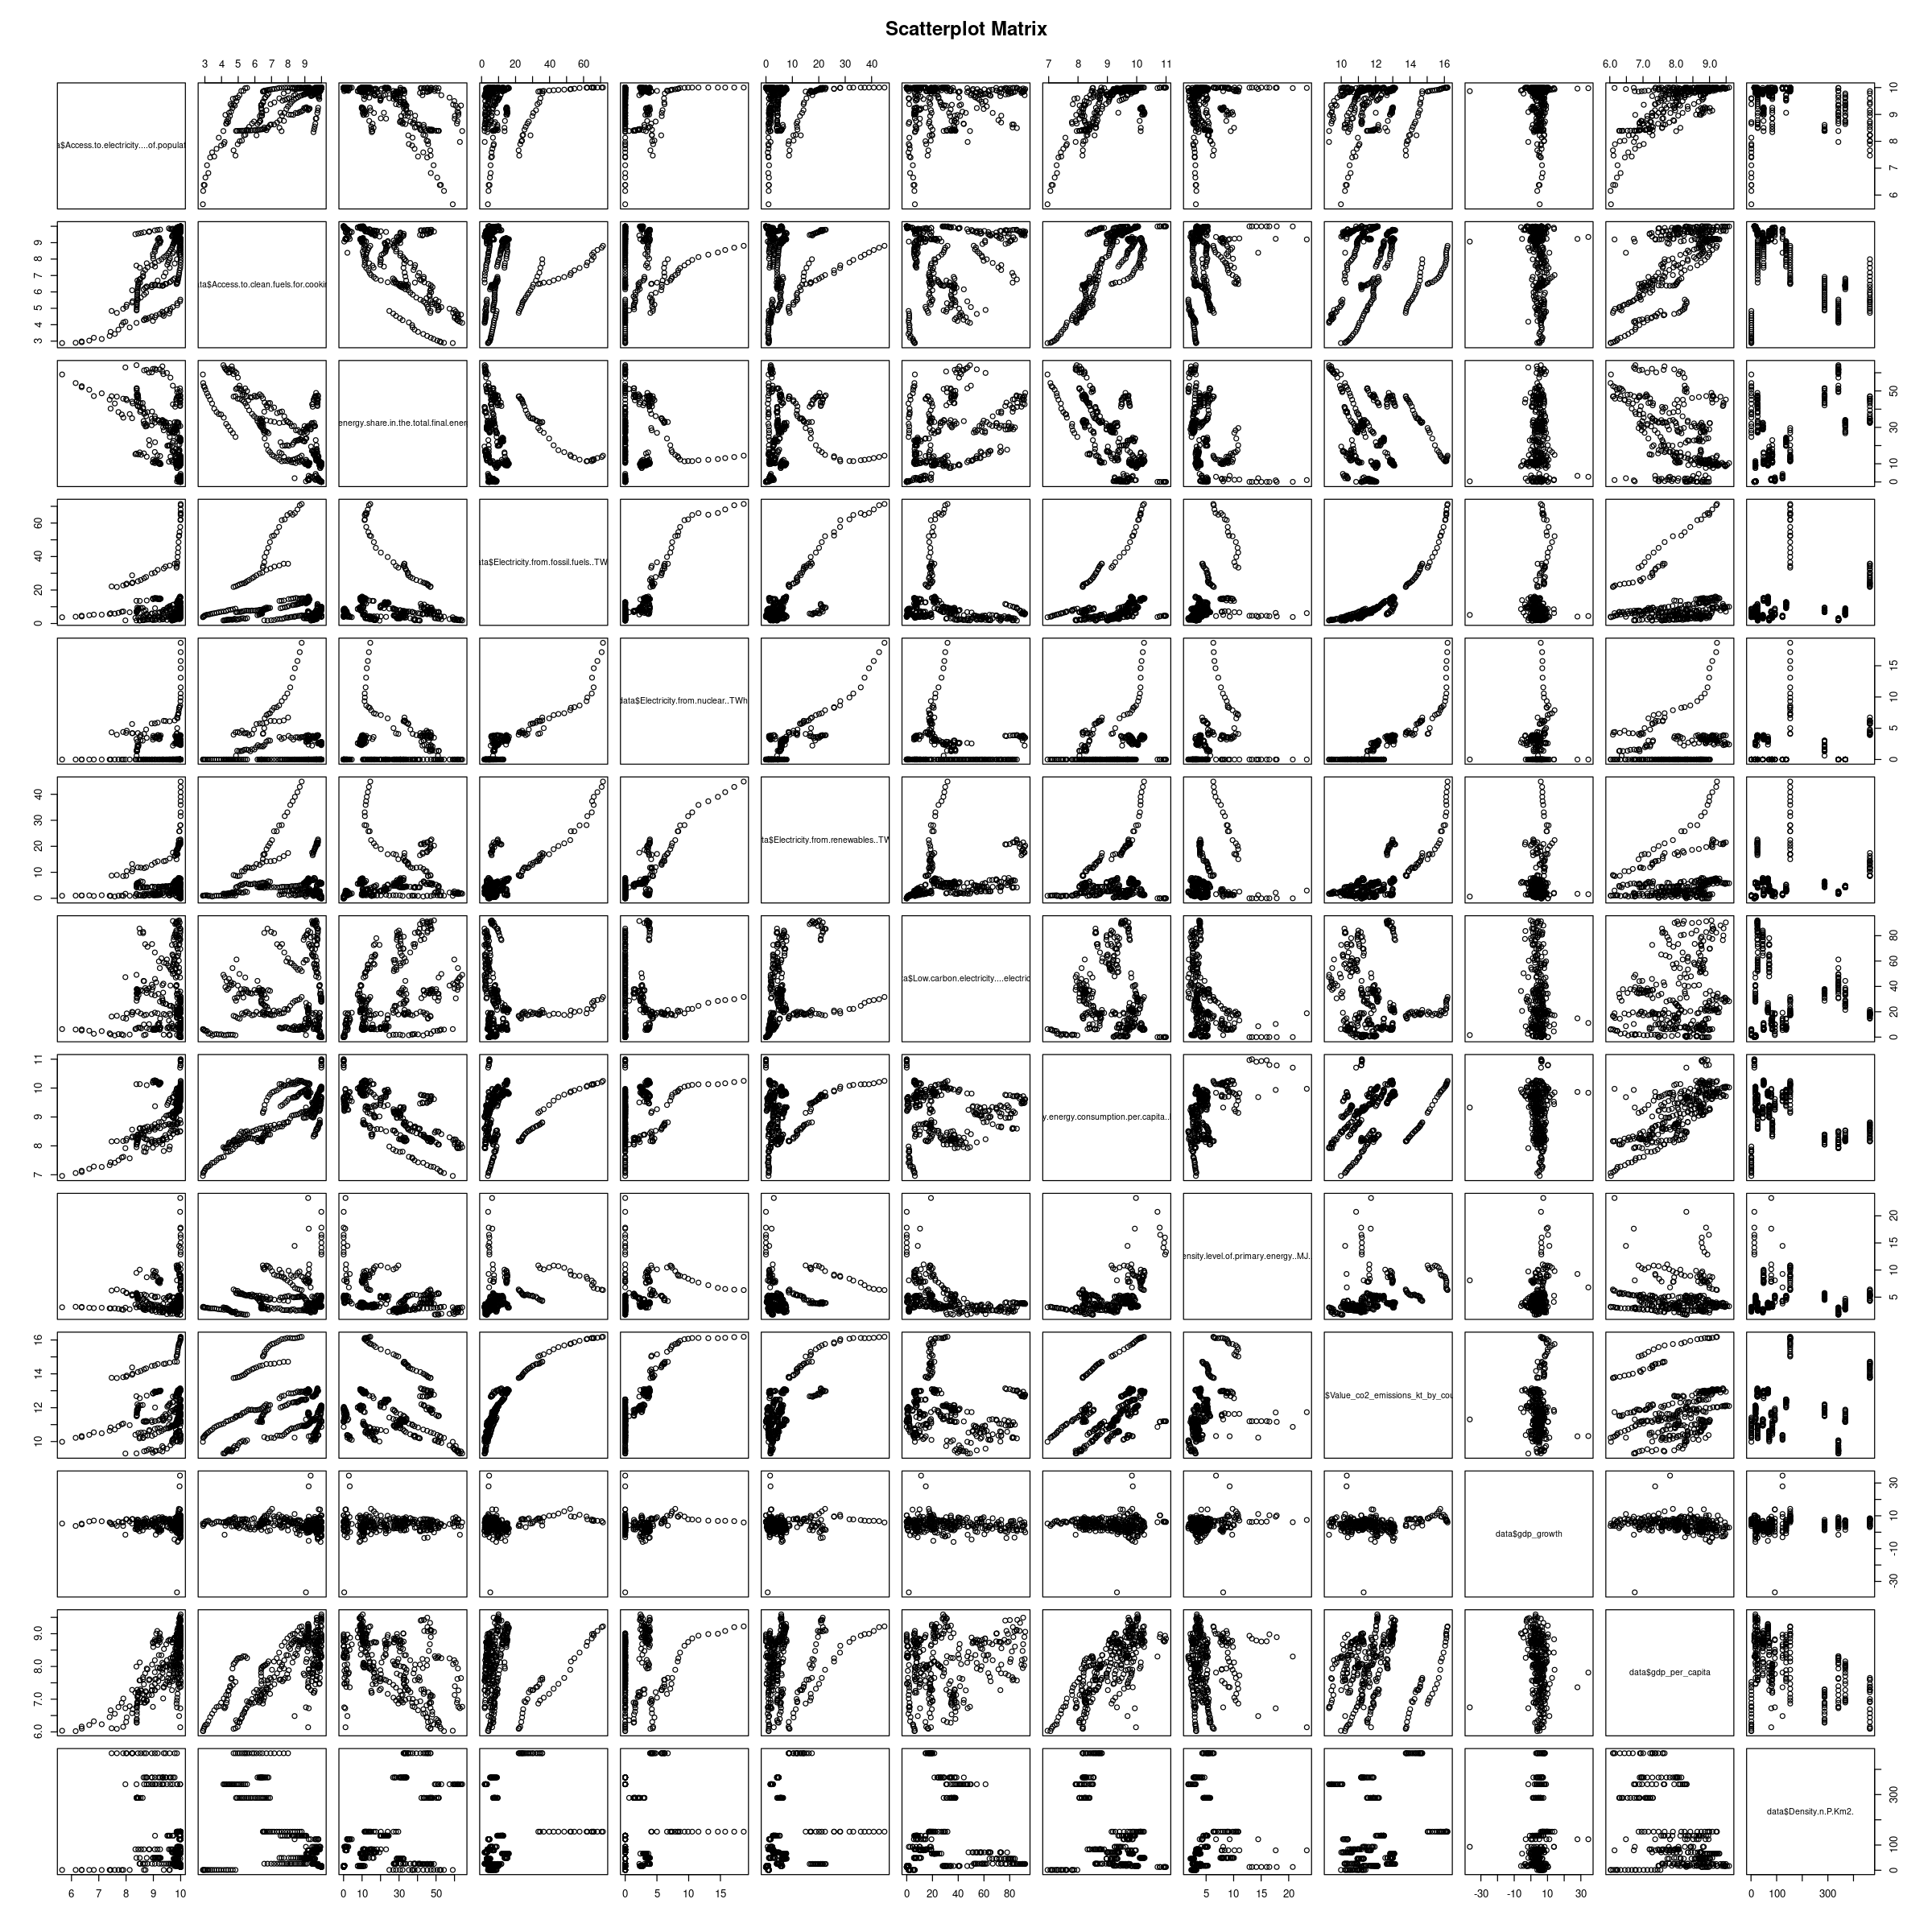

In [16]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs(~data$Access.to.electricity....of.population.	+
  data$Access.to.clean.fuels.for.cooking	+
  data$Renewable.energy.share.in.the.total.final.energy.consumption....	+
  data$Electricity.from.fossil.fuels..TWh.	+
  data$Electricity.from.nuclear..TWh.	+
  data$Electricity.from.renewables..TWh.	+
  data$Low.carbon.electricity....electricity.	+
  data$Primary.energy.consumption.per.capita..kWh.person.	+
  data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. +
  data$Value_co2_emissions_kt_by_country+ data$gdp_growth +
  data$gdp_per_capita+ data$Density.n.P.Km2. ,data=data, main="Scatterplot Matrix")

At first look this scatter plot does not give us much insight, but we can deduce the following :

* As access to electricity increases, so does the availability of clean fuels for cooking.
* As access to electricity increases, the share of renewable energy in total final energy consumption decreases.
* Regardless of GDP per capita, GDP growth remains more or less constant.

We then proceed to explore the correlations in the data set using a scatter plot

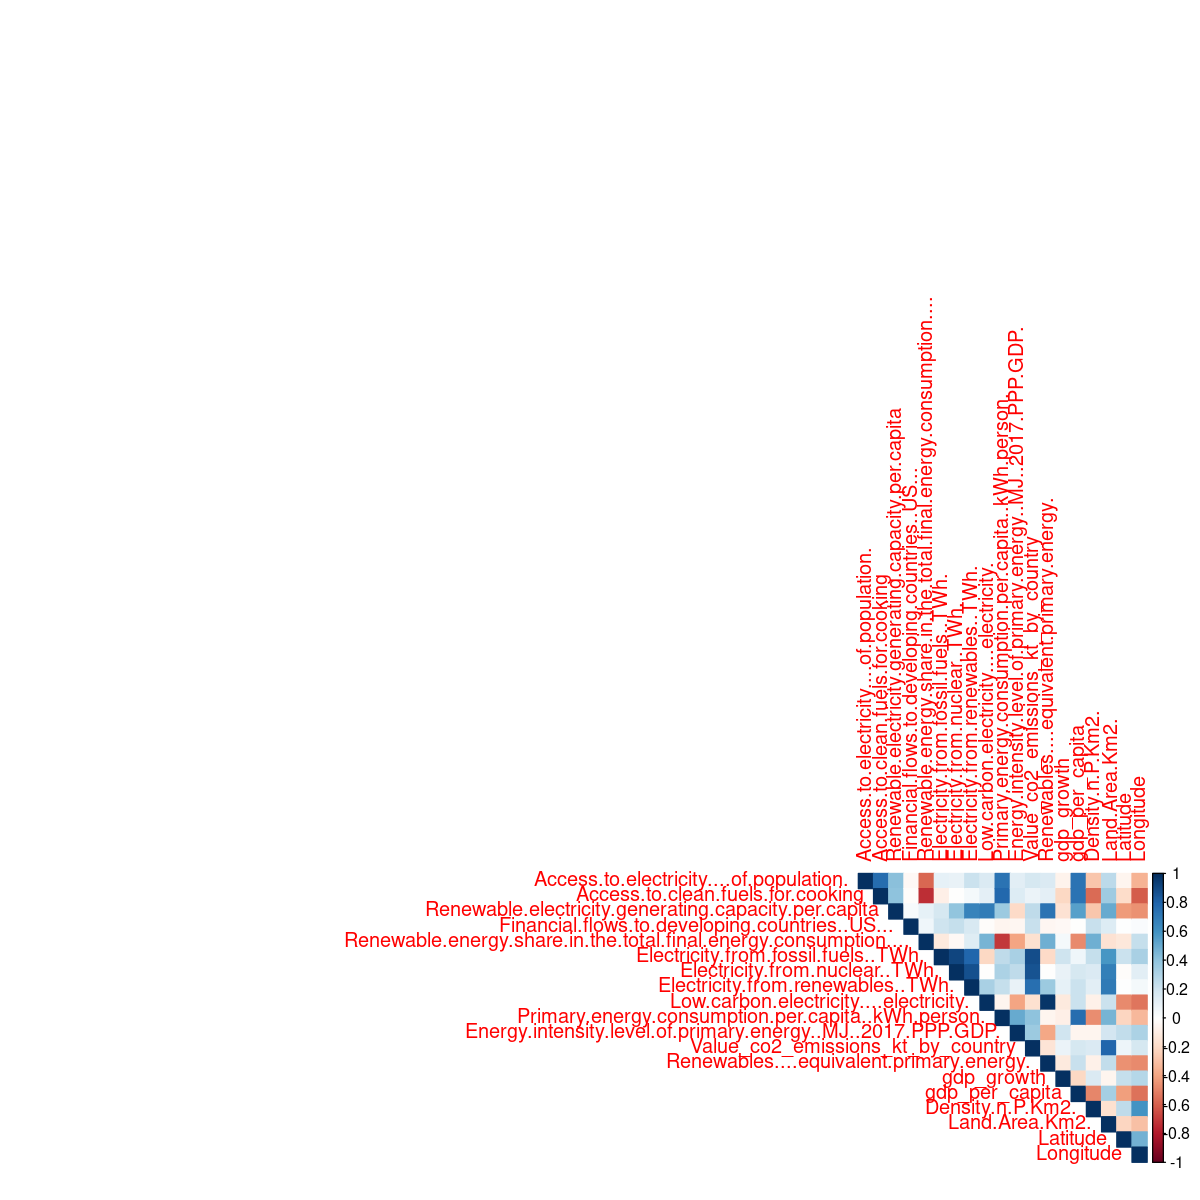

In [17]:
options(repr.plot.width = 10, repr.plot.height = 10)
clean_data <- na.omit(data)

M = cor(clean_data[,-c(1,2)])
corrplot(M, method="color", type="upper")

This correlation plot confirms that the access to electricity and the availability of clean fuels for cooking are negatively correlated to the share of renewable energy in total final energy consumption, and that the access to electricity and the availability of clean fuels for cooking is positively correlated.

Electricity from fossil fuels are correlated to electricity from renewables, which tells us that when a country produces a lot of energy from renewables, it is also likely that they produce a lot of fossil fuel. Electricity from nuclear is also correlated to the production of the other sources of energy. We also notice that for countries with bigger land area, more energy is produced (fossil, renewable and nuclear), and the carbon dioxide emissions per person is also bigger.

Primary energy consumption per capita is correlated to the GDP per capita.

We also learn that the variable "electricity from fossil fuels" is strongly positively correlated to the carbon dioxide emissions per person. In addition, electricity from renewables and electricity from nuclear is also positively correlated, electricity from renewables more than electricity from nuclear.

Other variables can also be commented, but the ones mentioned above gives us the most certain information. We also notice that a lot of the variables is not correlated at all or barely positively or negatively correlated.


## Question 7

The following commands perform a Principal Component Analysis (PCA) on quantitative variables.

In [18]:
# Selection of quantitative variables
data_quantitative <- data_complete[, sapply(data_complete, is.numeric)]

# ACP on quantitative variables
acp <- PCA(data_quantitative, scale.unit = TRUE, graph = FALSE, ncp = 9)

#List of the first 10 eigenvalues
print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
head(acp$eig, 10)

[1] "Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:"


,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,5.2728417,26.364208,26.36421
comp 2,4.5208952,22.604476,48.96868
comp 3,3.5790577,17.895288,66.86397
comp 4,1.4599892,7.299946,74.16392
comp 5,0.9663434,4.831717,78.99564
comp 6,0.9122868,4.561434,83.55707
comp 7,0.7945266,3.972633,87.52970
comp 8,0.7006800,3.503400,91.03310
comp 9,0.5001528,2.500764,93.53387
comp 10,0.3485242,1.742621,95.27649


We observe a cumulative percentage of variance of 87.87116 corrisponding to 9 eigenvalues. Then, we will keep 9 dimensions as 87.87116% > 85%. 

The next plot shows the percentage of explained variance corresponding to each dimension.

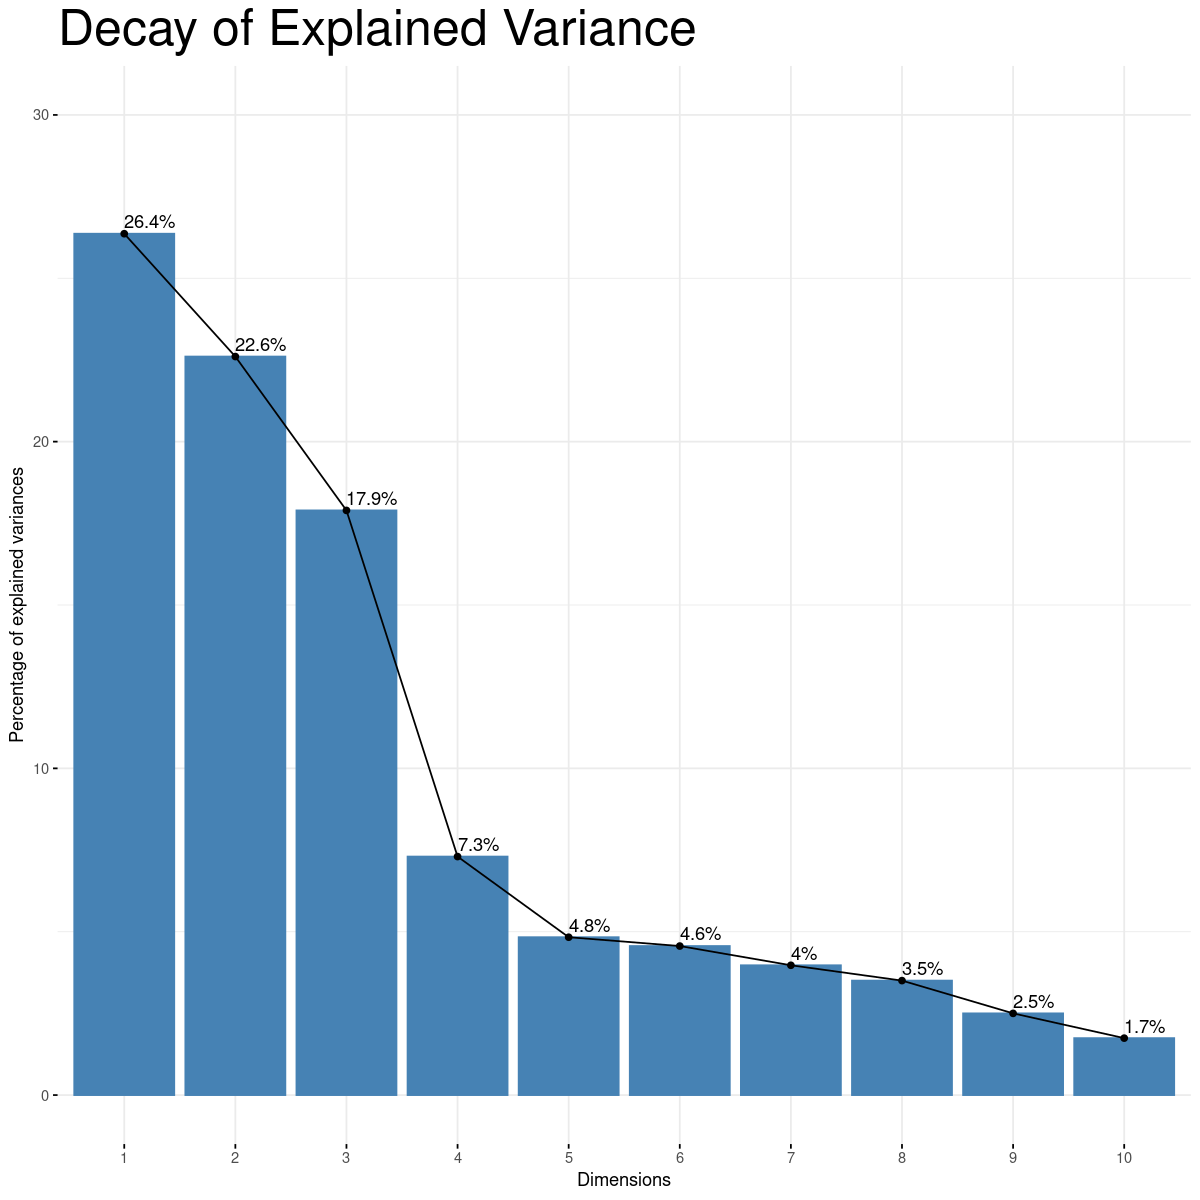

In [19]:
# Decay of Explained Variance
p <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 30)) +
  ggtitle("Decay of Explained Variance") +
  theme(plot.title = element_text(size = 30))

# Display the plot
print(p)

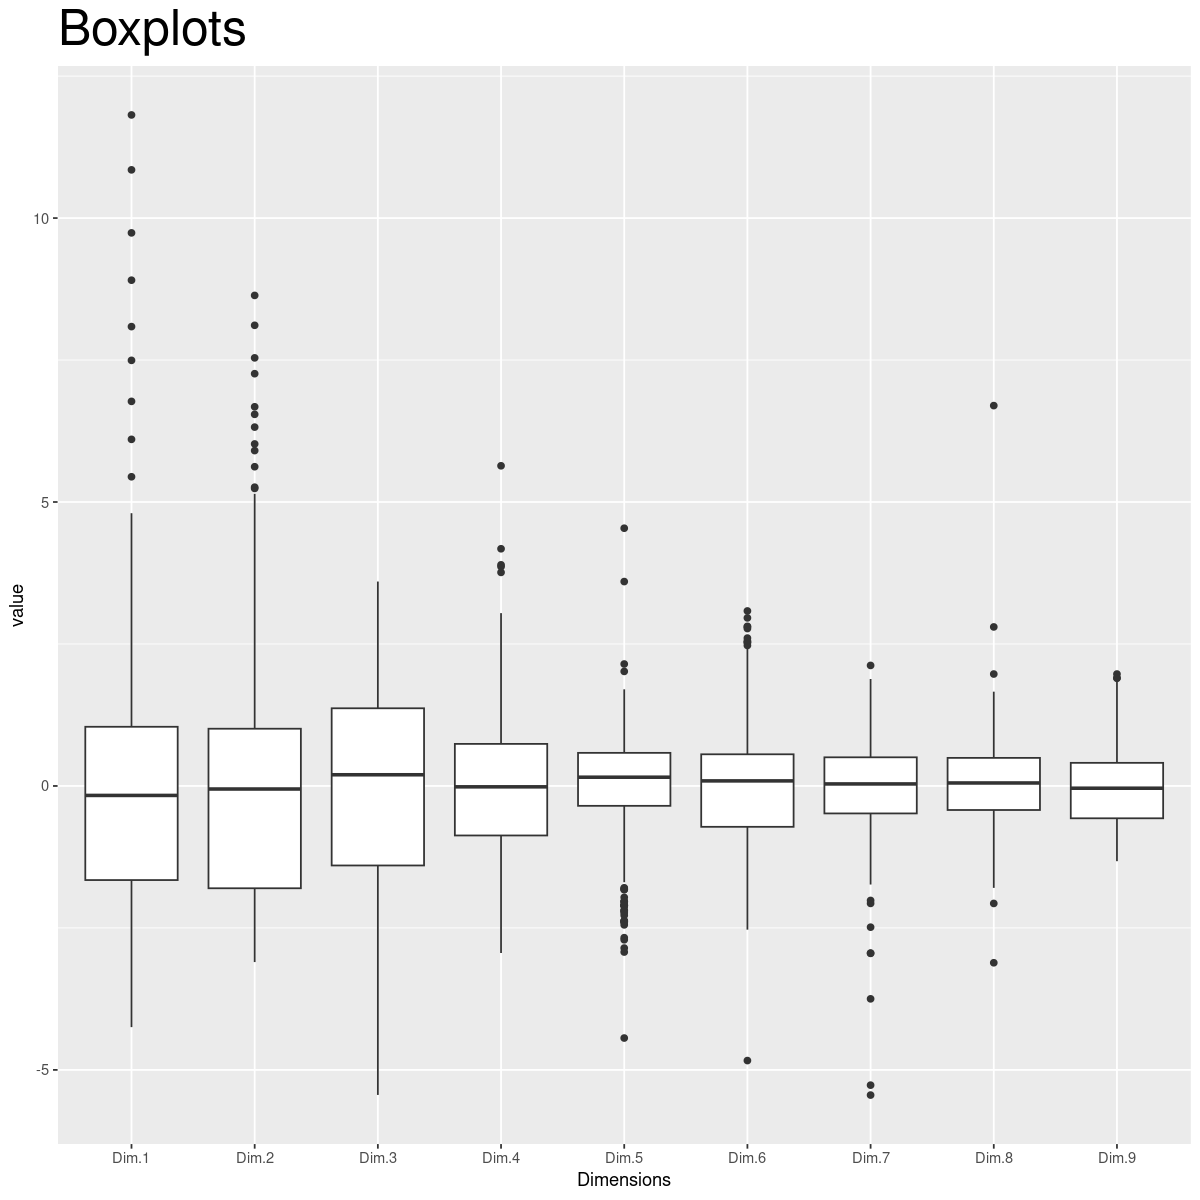

In [20]:
# Boxplots for individual coordinates
ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot() +
  ggtitle("Boxplots ") +
  xlab("Dimensions") +
  theme(plot.title = element_text(size = 30))


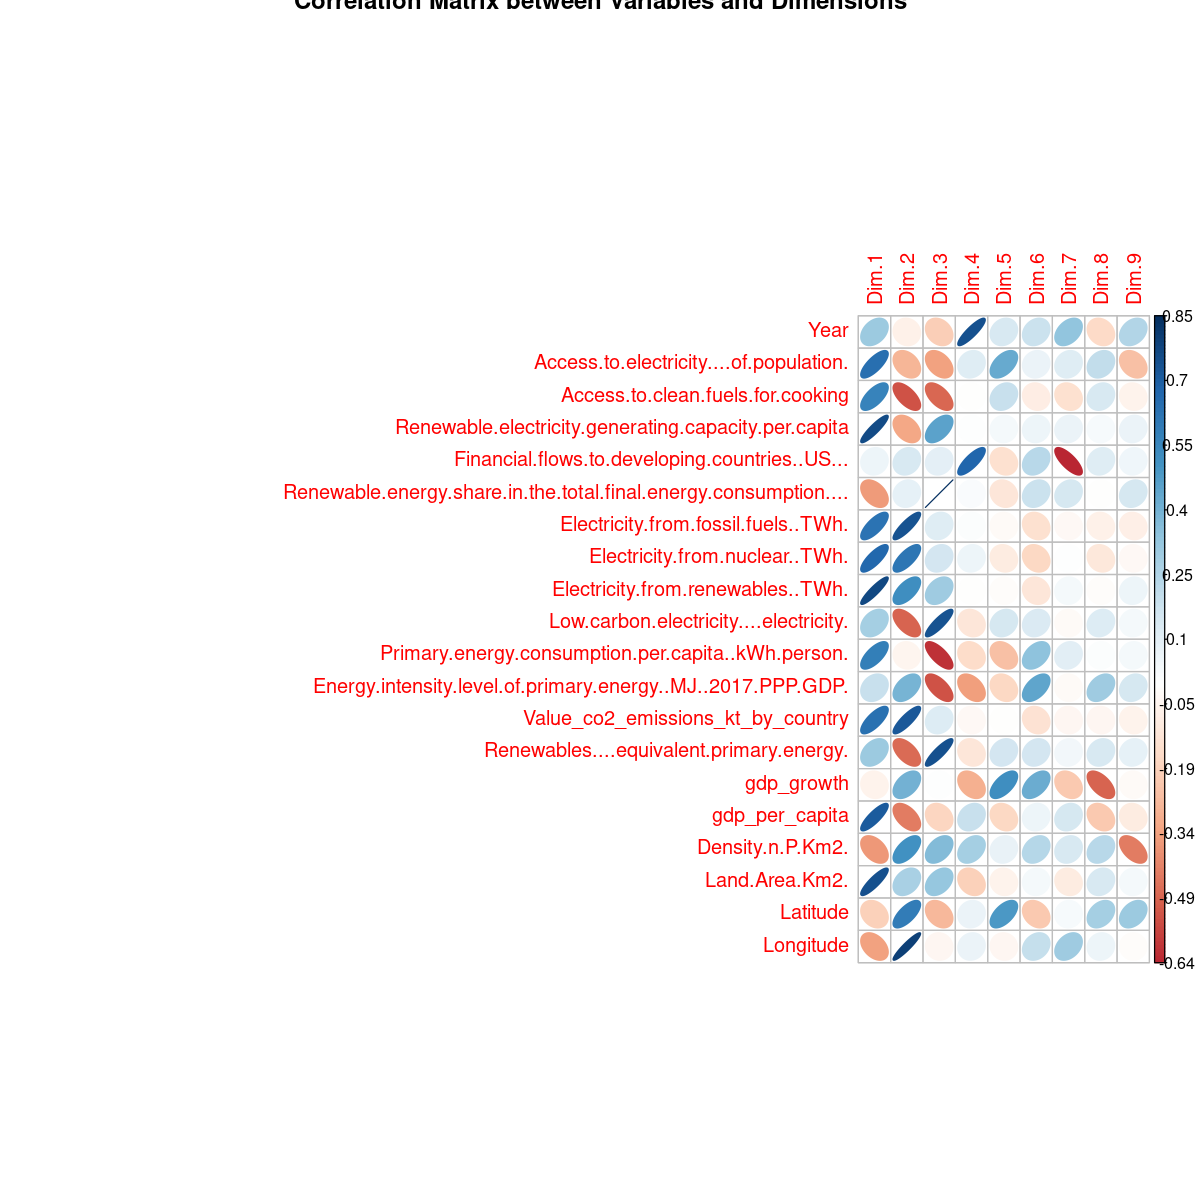

In [21]:
# Correlation matrix between variables and dimensions 
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse", 
         title = "Correlation Matrix between Variables and Dimensions")

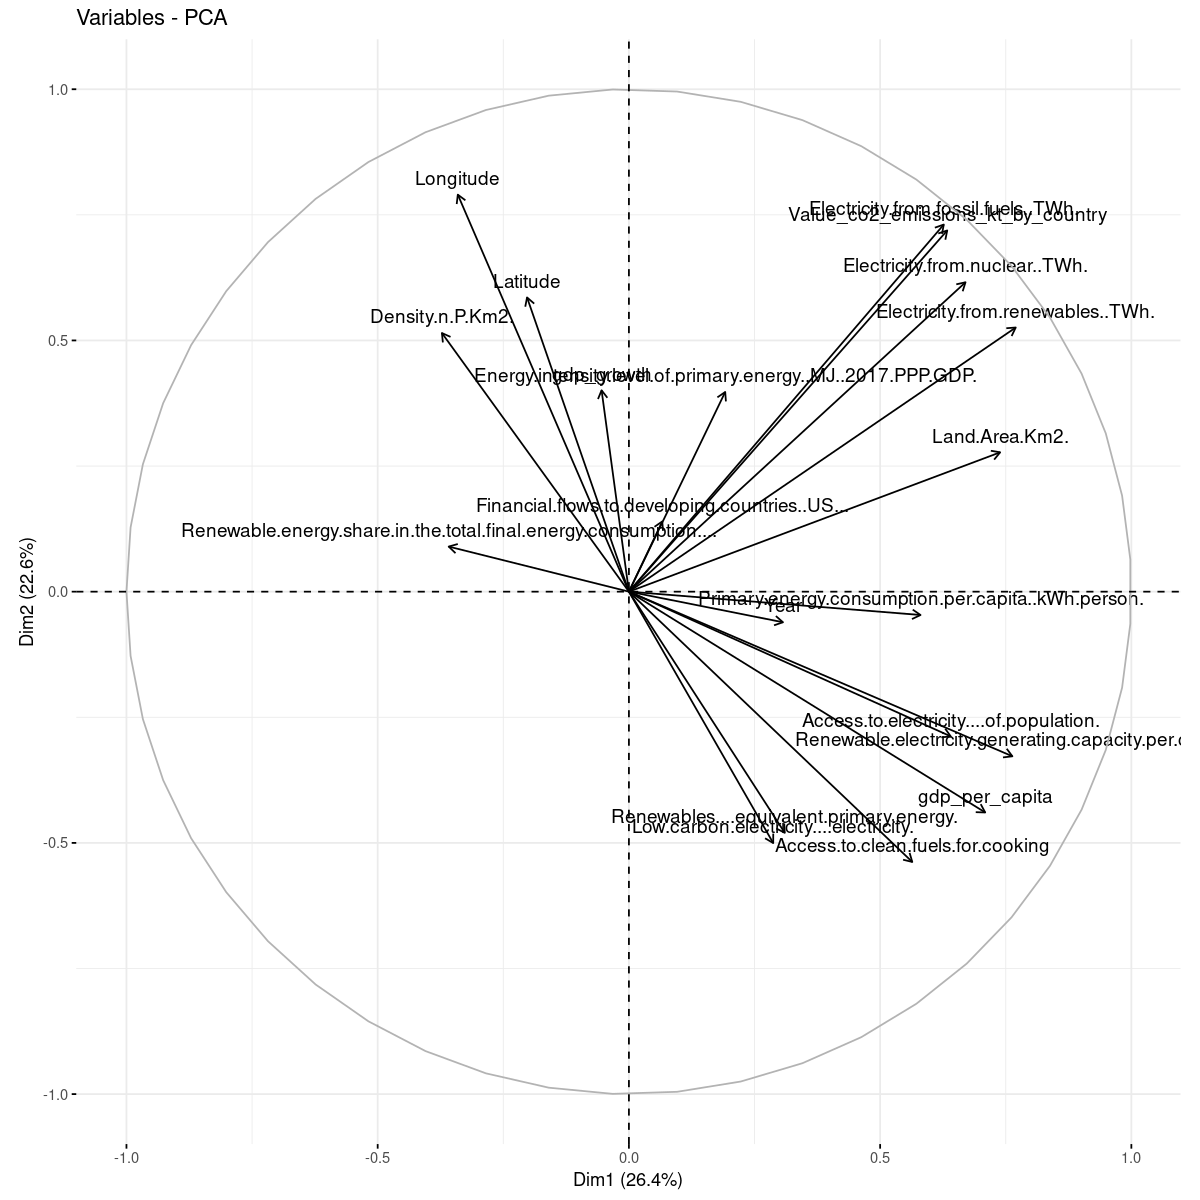

In [22]:
#Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2 of Principal Component Analysis (PCA
fviz_pca_var(acp, axes = c(1, 2), asp = 1)

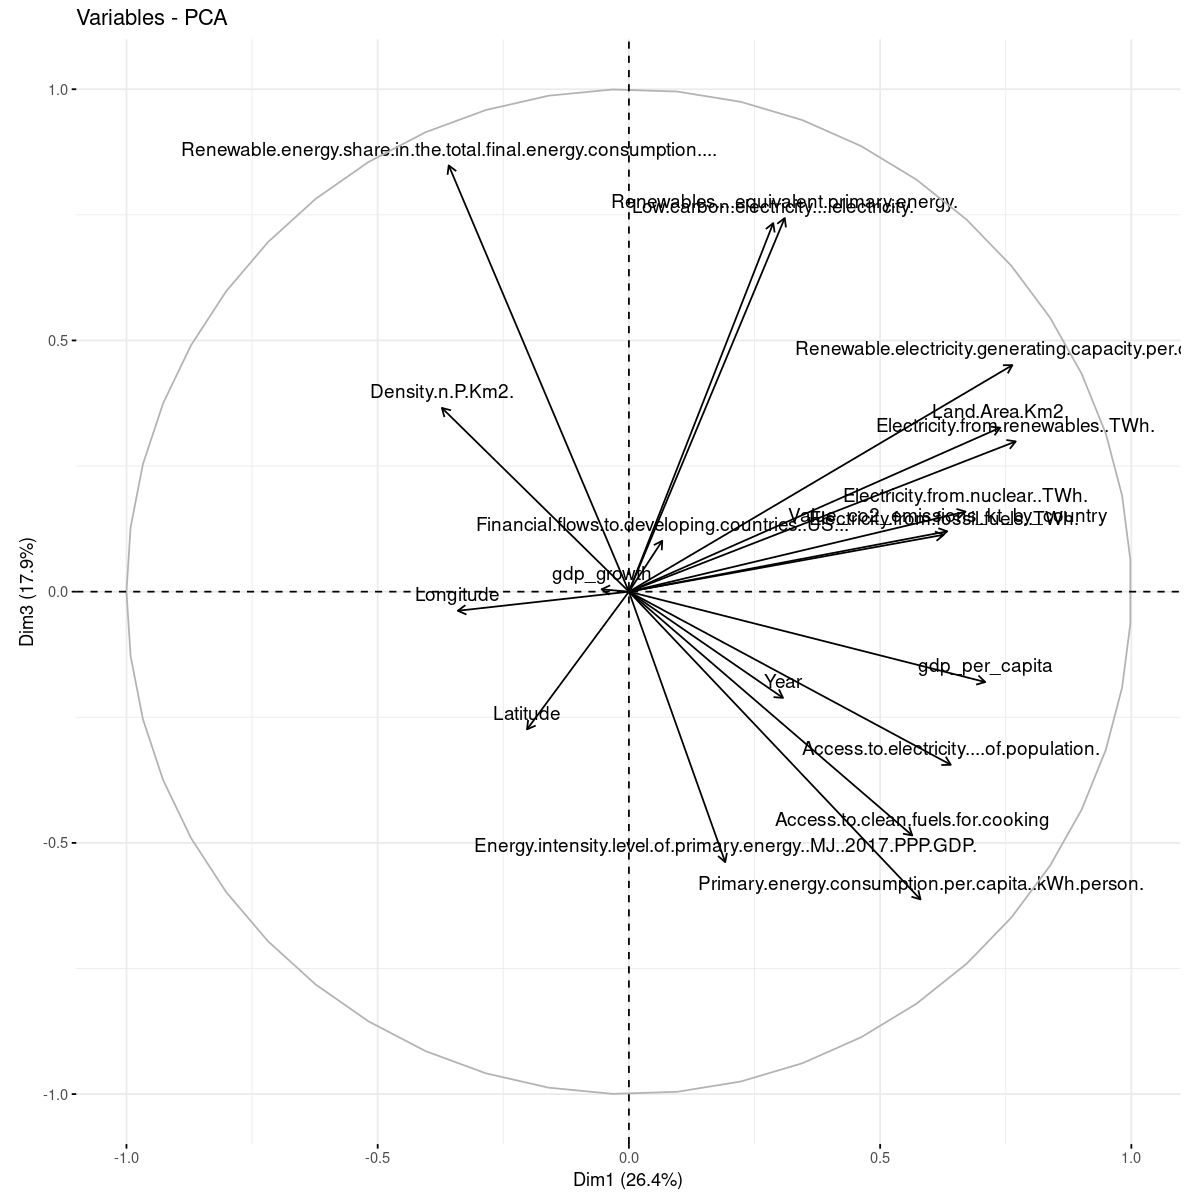

In [23]:
#Projection of variables onto the factorial plane composed of dimensions 1 and 3 of Principal Component Analysis (PCA).
fviz_pca_var(acp,axes=c(1,3))

## Question 8

Visualisation de la possible dépendance entre la variable "Year" et la variable à prédire, "Value-co2-emissions".

1. Graphique de dispersion.

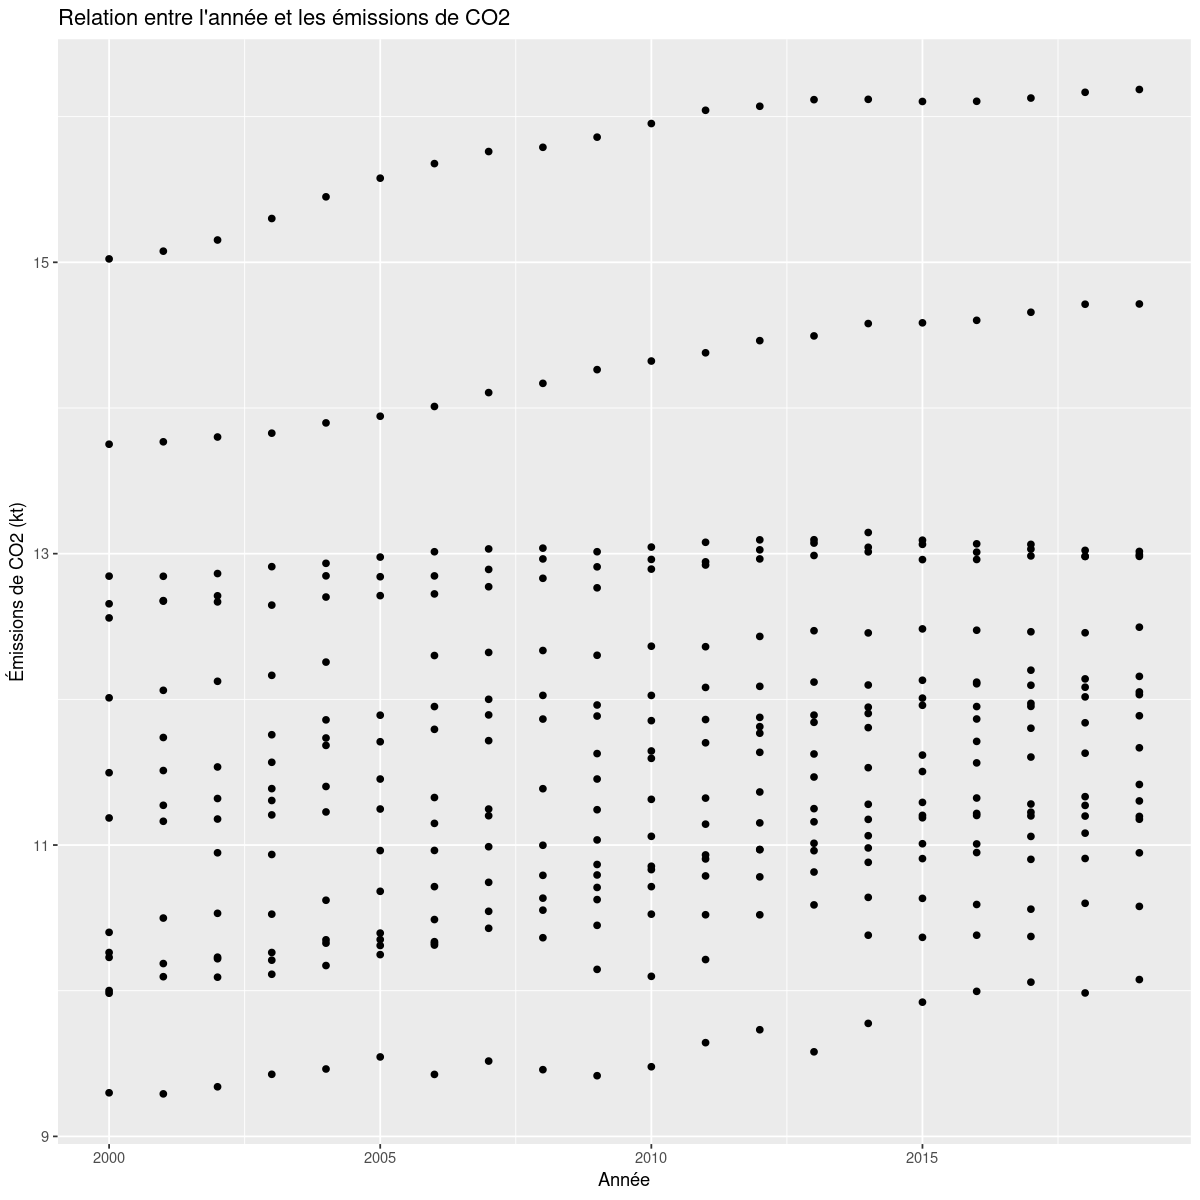

In [24]:
###
#### Pas sûre que c'est ce que les profs attendent
###
######
###
###

# Créer un graphique de dispersion
ggplot(data, aes(x = Year, y = Value_co2_emissions_kt_by_country)) +
  geom_point() +
  labs(x = "Année", y = "Émissions de CO2 (kt)") +
  ggtitle("Relation entre l'année et les émissions de CO2")

2. Coefficient de corrélation

In [25]:
#Coefficient de corrélation entre "Year" et "Value-co2-emissions".
correlation <- cor(data$Year, data$Value_co2_emissions_kt_by_country)
correlation

[1] 0.1034752

Un coefficient de corrélation proche de 1 ou -1 indique une forte corrélation, tandis qu'un coefficient proche de 0 indique une faible corrélation.
Nous observons une corrélation de 0.02, donc il n'existe pas une grande dépendance entre la variable "Year" et la variable "Value-co2-emissions".

3. Modèle de régression linéaire

In [26]:
#Modèle de régression linéaire pour prédire les émissions de CO2 en fonction de l'année
lm_model <- lm(Value_co2_emissions_kt_by_country ~ Year, data = data)
summary(lm_model)


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4486 -1.0677 -0.2374  0.9466  4.1422 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -42.98480   28.56581  -1.505   0.1333  
Year          0.02730    0.01421   1.921   0.0556 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.497 on 341 degrees of freedom
Multiple R-squared:  0.01071,	Adjusted R-squared:  0.007806 
F-statistic: 3.691 on 1 and 341 DF,  p-value: 0.05555


 * Les p-values associées aux coefficients (0.285 pour l'intercept et 0.271 pour l'année) sont toutes deux supérieures à un seuil de signification communément utilisé de 0.05. Cela signifie qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle les coefficients sont nuls, ce qui suggère qu'il n'y a pas de relation significative entre l'année et les émissions de CO2.

* Le coefficient de détermination (R²) est très proche de zéro (0.0004224), ce qui indique que la régression linéaire ne parvient pas à expliquer une grande partie de la variation dans les émissions de CO2 à partir de l'année.

* Le test F a une statistique de 1.211 avec une p-value de 0.2712, ce qui confirme le manque de significativité globale du modèle de régression.

En conclusion, ces résultats suggèrent qu'il n'y a pas de relation significative entre l'année et les émissions de CO2 dans vos données.

# Modélisation


## Question 1

Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon test. Vous prendrez un pourcentage de 20% pour l’échantillon test.

In [27]:
###


Pourquoi cette étape est-elle nécessaire lorsque nous nous concentrons sur les performances des algorithmes ?

* Évaluation impartiale : Diviser les données en un ensemble d'apprentissage et un ensemble de test permet d'évaluer objectivement les performances de notre modèle. En utilisant un ensemble de test distinct, nous pouvons estimer la capacité de généralisation du modèle sur des données invisibles.

* Prévention du surapprentissage : L'utilisation d'un ensemble de test distinct permet de détecter le surapprentissage (overfitting) du modèle. Le surapprentissage se produit lorsqu'un modèle est trop complexe et capture le bruit dans les données d'apprentissage plutôt que les véritables relations. En évaluant le modèle sur un ensemble de test indépendant, nous pouvons détecter si le modèle généralise correctement ou s'il est trop spécifique aux données d'apprentissage.

* Optimisation des hyperparamètres : Lorsque nous ajustons les hyperparamètres du modèle (par exemple, la profondeur d'un arbre de décision, le nombre de voisins dans un algorithme k-plus proches voisins), diviser les données en ensembles d'apprentissage et de test nous permet de sélectionner les valeurs d'hyperparamètres qui donnent les meilleures performances sur des données invisibles.

* Estimation des performances attendues : Une fois que nous avons choisi un modèle final, nous pouvons l'évaluer sur l'ensemble de test pour obtenir une estimation honnête de ses performances attendues dans des situations réelles.